In [1]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from collections import Counter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [3]:
# Configure paths
PROJECT_ROOT = Path.cwd().parents[1]
DATA_DIR = PROJECT_ROOT / "data" / "processed"

ELLIPTIC_GRAPH = DATA_DIR / "elliptic" / "graph.gpickle"
ER_GRAPH = DATA_DIR / "random" / "erdos_renyi" / "graph.gpickle"
BA_GRAPH = DATA_DIR / "random" / "barabasi_albert" / "graph.gpickle"

OUTPUT_DIR = PROJECT_ROOT / "experiments"  / "plots"
RESULTS_DIR = OUTPUT_DIR.parent / "results"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"Data files exist: Bitcoin={ELLIPTIC_GRAPH.exists()}, ER={ER_GRAPH.exists()}, BA={BA_GRAPH.exists()}")

PROJECT_ROOT: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis
Data files exist: Bitcoin=True, ER=True, BA=True


In [4]:
# Configure plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

# Define consistent colors
COLORS = {
    'bitcoin': '#2E86AB',
    'erdos_renyi': '#A9A9A9',
    'barabasi': '#E63946',
    'licit': '#27AE60',
    'illicit': '#E74C3C',
    'unknown': '#95A5A6'
}

print("✅ Plot style configured")

✅ Plot style configured


In [6]:
# Load all graphs
print("Loading graphs...")

with open(ELLIPTIC_GRAPH, 'rb') as f:
    G_bitcoin = pickle.load(f)
print(f"  Bitcoin: {G_bitcoin.number_of_nodes():,} nodes, {G_bitcoin.number_of_edges():,} edges")

with open(ER_GRAPH, 'rb') as f:
    G_er = pickle.load(f)
print(f"  Erdős–Rényi: {G_er.number_of_nodes():,} nodes, {G_er.number_of_edges():,} edges")

with open(BA_GRAPH, 'rb') as f:
    G_ba = pickle.load(f)
print(f"  Barabási–Albert: {G_ba.number_of_nodes():,} nodes, {G_ba.number_of_edges():,} edges")

graphs = {
    'Bitcoin': G_bitcoin,
    'Erdős–Rényi': G_er,
    'Barabási–Albert': G_ba
}

print("\n✅ All graphs loaded")

Loading graphs...
  Bitcoin: 203,769 nodes, 234,355 edges
  Erdős–Rényi: 203,769 nodes, 233,058 edges
  Barabási–Albert: 203,769 nodes, 407,536 edges

✅ All graphs loaded


In [7]:
# Basic graph statistics
print("="*80)
print("BASIC GRAPH STATISTICS")
print("="*80)

for name, G in graphs.items():
    print(f"\n{name}:")
    print(f"  Nodes: {G.number_of_nodes():,}")
    print(f"  Edges: {G.number_of_edges():,}")
    print(f"  Directed: {G.is_directed()}")
    print(f"  Density: {nx.density(G):.6e}")
    print(f"  Weakly Connected: {nx.is_weakly_connected(G)}")
    print(f"  Connected Components: {nx.number_weakly_connected_components(G):,}")

BASIC GRAPH STATISTICS

Bitcoin:
  Nodes: 203,769
  Edges: 234,355
  Directed: True
  Density: 5.644171e-06
  Weakly Connected: False
  Connected Components: 49

Erdős–Rényi:
  Nodes: 203,769
  Edges: 233,058
  Directed: True
  Density: 5.612934e-06
  Weakly Connected: False
  Connected Components: 23,966

Barabási–Albert:
  Nodes: 203,769
  Edges: 407,536
  Directed: True
  Density: 9.815036e-06
  Weakly Connected: True
  Connected Components: 1


## Experiment 1: Degree Distribution & Clustering Coefficient

Analyze degree distributions and clustering patterns to compare structural properties across graphs.

In [8]:
# Compute degree distributions
print("Computing degree distributions...")

degree_data = {}
for name, G in graphs.items():
    degree_data[name] = {
        'in': [d for n, d in G.in_degree()],
        'out': [d for n, d in G.out_degree()],
        'total': [d for n, d in G.degree()]
    }

print("✅ Degree distributions computed")

Computing degree distributions...
✅ Degree distributions computed


In [9]:
# Compute degree statistics
def degree_stats(degrees, name):
    return {
        'Dataset': name,
        'Mean': np.mean(degrees),
        'Median': np.median(degrees),
        'Std': np.std(degrees),
        'Min': np.min(degrees),
        'Max': np.max(degrees),
        'Q1': np.percentile(degrees, 25),
        'Q3': np.percentile(degrees, 75)
    }

in_degree_stats = pd.DataFrame([
    degree_stats(degree_data['Bitcoin']['in'], 'Bitcoin'),
    degree_stats(degree_data['Erdős–Rényi']['in'], 'Erdős–Rényi'),
    degree_stats(degree_data['Barabási–Albert']['in'], 'Barabási–Albert')
])

out_degree_stats = pd.DataFrame([
    degree_stats(degree_data['Bitcoin']['out'], 'Bitcoin'),
    degree_stats(degree_data['Erdős–Rényi']['out'], 'Erdős–Rényi'),
    degree_stats(degree_data['Barabási–Albert']['out'], 'Barabási–Albert')
])

print("IN-DEGREE STATISTICS")
print(in_degree_stats.to_string(index=False))
print("\nOUT-DEGREE STATISTICS")
print(out_degree_stats.to_string(index=False))

IN-DEGREE STATISTICS
        Dataset     Mean  Median      Std  Min  Max  Q1  Q3
        Bitcoin 1.150101     1.0 3.911122    0  284 0.0 1.0
    Erdős–Rényi 1.143736     1.0 1.067645    0    9 0.0 2.0
Barabási–Albert 1.999990     1.0 4.884336    1 1304 1.0 2.0

OUT-DEGREE STATISTICS
        Dataset     Mean  Median      Std  Min  Max  Q1  Q3
        Bitcoin 1.150101     1.0 1.894735    0  472 1.0 1.0
    Erdős–Rényi 1.143736     1.0 1.069275    0    8 0.0 2.0
Barabási–Albert 1.999990     1.0 4.884336    1 1304 1.0 2.0


✅ Saved: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/plots/exp1_degree_distribution.png


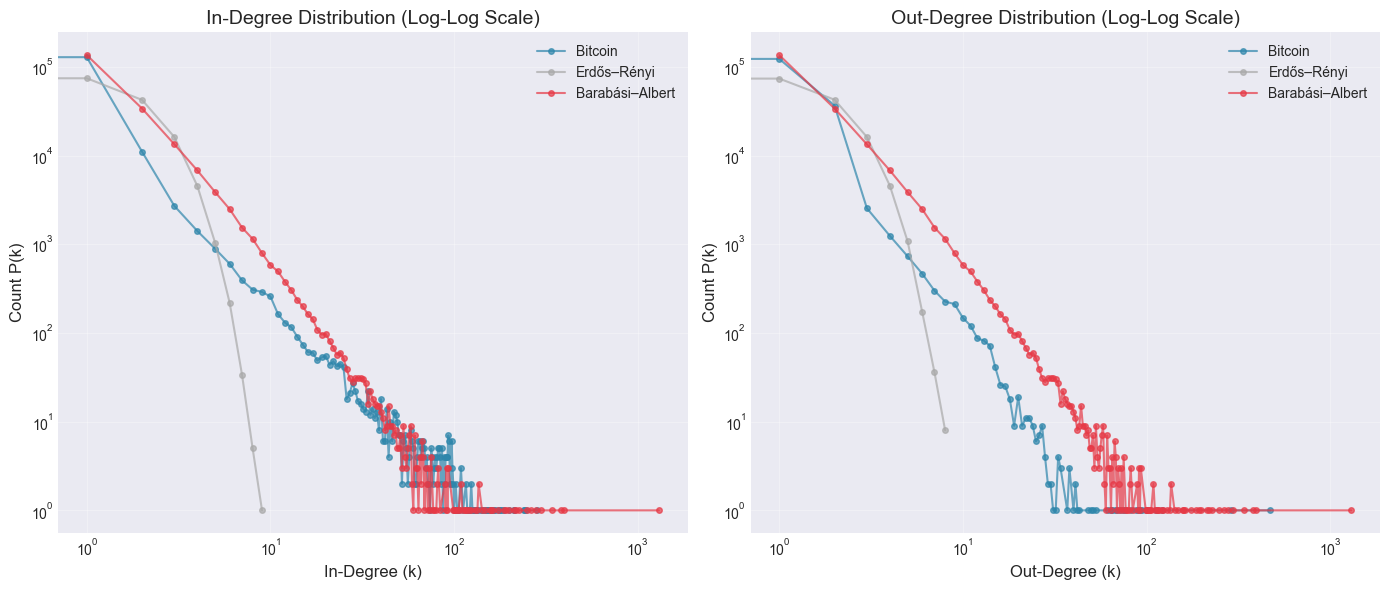

In [10]:
# Plot degree distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# In-degree distribution (log-log)
for name, color_key in [('Bitcoin', 'bitcoin'), ('Erdős–Rényi', 'erdos_renyi'), ('Barabási–Albert', 'barabasi')]:
    degrees = degree_data[name]['in']
    degree_counts = Counter(degrees)
    x = sorted(degree_counts.keys())
    y = [degree_counts[d] for d in x]
    axes[0].loglog(x, y, 'o-', color=COLORS[color_key], alpha=0.7, label=name, markersize=4)

axes[0].set_xlabel('In-Degree (k)')
axes[0].set_ylabel('Count P(k)')
axes[0].set_title('In-Degree Distribution (Log-Log Scale)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Out-degree distribution (log-log)
for name, color_key in [('Bitcoin', 'bitcoin'), ('Erdős–Rényi', 'erdos_renyi'), ('Barabási–Albert', 'barabasi')]:
    degrees = degree_data[name]['out']
    degree_counts = Counter(degrees)
    x = sorted(degree_counts.keys())
    y = [degree_counts[d] for d in x]
    axes[1].loglog(x, y, 'o-', color=COLORS[color_key], alpha=0.7, label=name, markersize=4)

axes[1].set_xlabel('Out-Degree (k)')
axes[1].set_ylabel('Count P(k)')
axes[1].set_title('Out-Degree Distribution (Log-Log Scale)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'exp1_degree_distribution.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: {OUTPUT_DIR / 'exp1_degree_distribution.png'}")
plt.show()

In [11]:
# Compute clustering coefficients
print("Computing clustering coefficients (this may take a few minutes)...")

clustering_coefficients = {}
local_clustering = {}

for name, G in graphs.items():
    G_undirected = G.to_undirected()
    clustering_coefficients[name] = nx.average_clustering(G_undirected)
    local_clustering[name] = list(nx.clustering(G_undirected).values())
    print(f"  {name}: {clustering_coefficients[name]:.6f}")

print("\n✅ Clustering coefficients computed")

Computing clustering coefficients (this may take a few minutes)...
  Bitcoin: 0.013762
  Erdős–Rényi: 0.000000
  Barabási–Albert: 0.000000

✅ Clustering coefficients computed


✅ Saved: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/plots/exp1_clustering_comparison.png


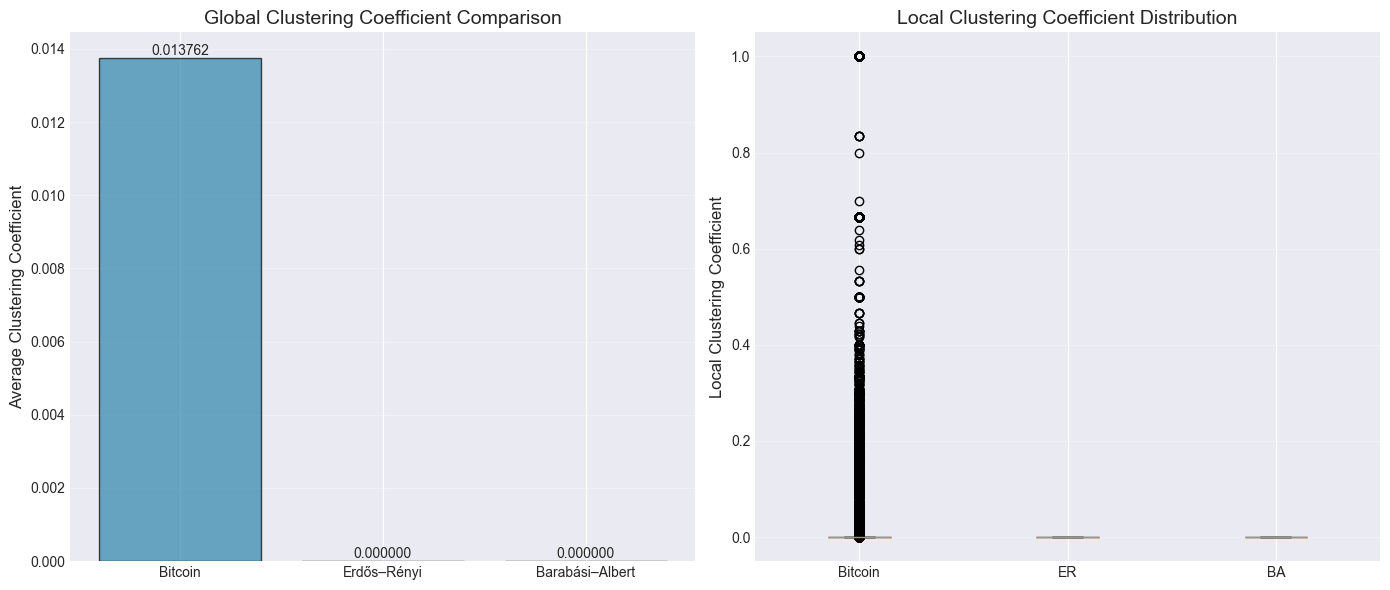

In [12]:
# Plot clustering coefficient comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Global clustering bar chart
datasets = list(clustering_coefficients.keys())
values = list(clustering_coefficients.values())
colors_list = [COLORS['bitcoin'], COLORS['erdos_renyi'], COLORS['barabasi']]

bars = axes[0].bar(datasets, values, color=colors_list, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Average Clustering Coefficient')
axes[0].set_title('Global Clustering Coefficient Comparison')
axes[0].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, values):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                f'{val:.6f}', ha='center', va='bottom', fontsize=10)

# Local clustering distribution
bp = axes[1].boxplot([local_clustering['Bitcoin'], local_clustering['Erdős–Rényi'], local_clustering['Barabási–Albert']],
                     labels=['Bitcoin', 'ER', 'BA'], patch_artist=True)

for patch, color in zip(bp['boxes'], colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].set_ylabel('Local Clustering Coefficient')
axes[1].set_title('Local Clustering Coefficient Distribution')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'exp1_clustering_comparison.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: {OUTPUT_DIR / 'exp1_clustering_comparison.png'}")
plt.show()

## Experiment 2: Transaction Motif Analysis

Identify characteristic transaction patterns (fan-in, fan-out, chains, triangles) that distinguish Bitcoin from random graphs.

In [13]:
# Fan-in motifs (consolidation patterns: many → one)
def count_fan_in_motifs(G):
    in_degrees = dict(G.in_degree())
    thresholds = [3, 5, 10, 20, 50, 100]
    counts = {}
    for thresh in thresholds:
        counts[f'fan_in_{thresh}+'] = sum(1 for d in in_degrees.values() if d >= thresh)
    return counts

print("Computing fan-in motifs...")
fan_in = {name: count_fan_in_motifs(G) for name, G in graphs.items()}

for name in graphs:
    print(f"  {name} fan-in (≥5): {fan_in[name]['fan_in_5+']}")

Computing fan-in motifs...
  Bitcoin fan-in (≥5): 4396
  Erdős–Rényi fan-in (≥5): 1297
  Barabási–Albert fan-in (≥5): 13584


In [14]:
# Fan-out motifs (distribution patterns: one → many)
def count_fan_out_motifs(G):
    out_degrees = dict(G.out_degree())
    thresholds = [3, 5, 10, 20, 50, 100]
    counts = {}
    for thresh in thresholds:
        counts[f'fan_out_{thresh}+'] = sum(1 for d in out_degrees.values() if d >= thresh)
    return counts

print("Computing fan-out motifs...")
fan_out = {name: count_fan_out_motifs(G) for name, G in graphs.items()}

for name in graphs:
    print(f"  {name} fan-out (≥5): {fan_out[name]['fan_out_5+']}")

Computing fan-out motifs...
  Bitcoin fan-out (≥5): 2695
  Erdős–Rényi fan-out (≥5): 1294
  Barabási–Albert fan-out (≥5): 13584


In [15]:
# Chain motifs (linear sequences: A → B → C → D)
def count_chain_motifs(G, sample_size=10000):
    if G.number_of_nodes() > sample_size:
        sample_nodes = np.random.choice(list(G.nodes()), size=sample_size, replace=False)
    else:
        sample_nodes = list(G.nodes())
    
    chain_lengths = []
    
    for node in sample_nodes:
        if G.in_degree(node) == 1 and G.out_degree(node) == 1:
            chain_len = 1
            current = node
            visited = {node}
            
            for _ in range(100):
                successors = list(G.successors(current))
                if len(successors) != 1:
                    break
                next_node = successors[0]
                if next_node in visited or G.in_degree(next_node) != 1:
                    break
                visited.add(next_node)
                chain_len += 1
                current = next_node
            
            if chain_len >= 3:
                chain_lengths.append(chain_len)
    
    return {
        'chain_3+': sum(1 for l in chain_lengths if l >= 3),
        'chain_5+': sum(1 for l in chain_lengths if l >= 5),
        'chain_10+': sum(1 for l in chain_lengths if l >= 10),
        'avg_chain_length': np.mean(chain_lengths) if chain_lengths else 0,
        'max_chain_length': max(chain_lengths) if chain_lengths else 0
    }

print("Computing chain motifs (this may take a minute)...")
chains = {name: count_chain_motifs(G) for name, G in graphs.items()}

for name in graphs:
    print(f"  {name} chains (≥5): {chains[name]['chain_5+']}")

Computing chain motifs (this may take a minute)...
  Bitcoin chains (≥5): 1137
  Erdős–Rényi chains (≥5): 0
  Barabási–Albert chains (≥5): 0


In [18]:
# Triangle motifs (3-cycles)
def count_triangle_motifs(G, sample_size=10000):
    G_undirected = G.to_undirected()
    
    if G.number_of_nodes() > sample_size:
        sample_nodes = set(np.random.choice(list(G.nodes()), size=sample_size, replace=False))
        G_sample = G_undirected.subgraph(sample_nodes)
    else:
        G_sample = G_undirected
    
    triangles = nx.triangles(G_sample)
    total_triangles = sum(triangles.values()) // 3
    
    if G.number_of_nodes() > sample_size:
        scaling_factor = G.number_of_nodes() / sample_size
        total_triangles = int(total_triangles * scaling_factor)
    
    return {
        'total_triangles': total_triangles,
        'triangles_per_1000_nodes': (total_triangles / G.number_of_nodes()) * 1000
    }

print("Computing triangle motifs...")
triangles = {name: count_triangle_motifs(G) for name, G in graphs.items()}

for name in graphs:
    print(f"  {name} triangles: {triangles[name]['total_triangles']:,}")

Computing triangle motifs...
  Bitcoin triangles: 0
  Erdős–Rényi triangles: 0
  Barabási–Albert triangles: 0


In [19]:
# Compile motif summary
motif_data = []
for name in graphs:
    motif_data.append({
        'Dataset': name,
        'Fan-In (5+)': fan_in[name]['fan_in_5+'],
        'Fan-In (10+)': fan_in[name]['fan_in_10+'],
        'Fan-Out (5+)': fan_out[name]['fan_out_5+'],
        'Fan-Out (10+)': fan_out[name]['fan_out_10+'],
        'Chains (5+)': chains[name]['chain_5+'],
        'Chains (10+)': chains[name]['chain_10+'],
        'Triangles': triangles[name]['total_triangles'],
        'Avg Chain Length': chains[name]['avg_chain_length']
    })

motif_df = pd.DataFrame(motif_data)

print("="*80)
print("MOTIF SUMMARY")
print("="*80)
print(motif_df.to_string(index=False))

MOTIF SUMMARY
        Dataset  Fan-In (5+)  Fan-In (10+)  Fan-Out (5+)  Fan-Out (10+)  Chains (5+)  Chains (10+)  Triangles  Avg Chain Length
        Bitcoin         4396          1912          2695            758         1137           535          0         10.291823
    Erdős–Rényi         1297             0          1294              0            0             0          0          3.071429
Barabási–Albert        13584          3724         13584           3724            0             0          0          0.000000


In [20]:
# Compute enrichment ratios
motif_columns = ['Fan-In (5+)', 'Fan-Out (5+)', 'Chains (5+)', 'Triangles']

bitcoin_vals = motif_df[motif_df['Dataset'] == 'Bitcoin'][motif_columns].values[0]
er_vals = motif_df[motif_df['Dataset'] == 'Erdős–Rényi'][motif_columns].values[0]
ba_vals = motif_df[motif_df['Dataset'] == 'Barabási–Albert'][motif_columns].values[0]

enrichment_data = []
for i, col in enumerate(motif_columns):
    enrichment_data.append({
        'Motif Type': col,
        'Bitcoin Count': bitcoin_vals[i],
        'ER Count': er_vals[i],
        'BA Count': ba_vals[i],
        'vs ER (fold)': bitcoin_vals[i] / max(er_vals[i], 1),
        'vs BA (fold)': bitcoin_vals[i] / max(ba_vals[i], 1)
    })

enrichment_df = pd.DataFrame(enrichment_data)

print("\nMOTIF ENRICHMENT RATIOS (Bitcoin / Random)")
print(enrichment_df.to_string(index=False))


MOTIF ENRICHMENT RATIOS (Bitcoin / Random)
  Motif Type  Bitcoin Count  ER Count  BA Count  vs ER (fold)  vs BA (fold)
 Fan-In (5+)           4396      1297     13584      3.389360      0.323616
Fan-Out (5+)           2695      1294     13584      2.082689      0.198395
 Chains (5+)           1137         0         0   1137.000000   1137.000000
   Triangles              0         0         0      0.000000      0.000000


✅ Saved: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/plots/exp2_motif_analysis.png


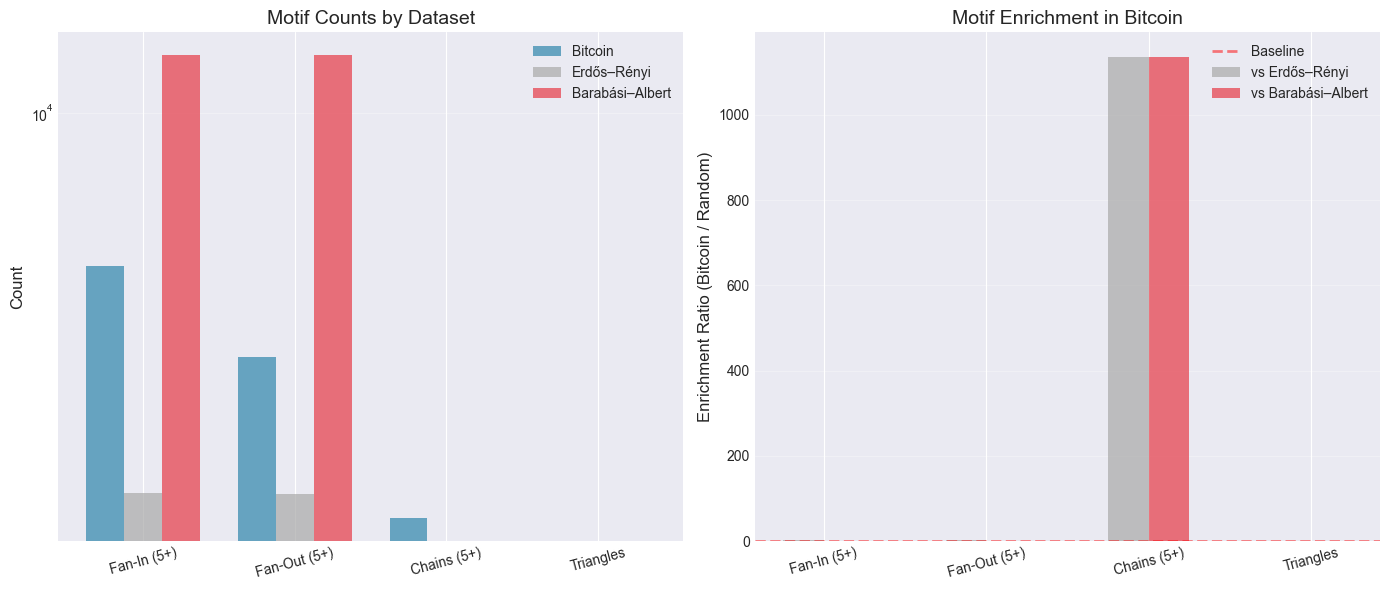

In [21]:
# Plot motif comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Motif counts
x = np.arange(len(motif_columns))
width = 0.25

axes[0].bar(x - width, bitcoin_vals, width, label='Bitcoin', color=COLORS['bitcoin'], alpha=0.7)
axes[0].bar(x, er_vals, width, label='Erdős–Rényi', color=COLORS['erdos_renyi'], alpha=0.7)
axes[0].bar(x + width, ba_vals, width, label='Barabási–Albert', color=COLORS['barabasi'], alpha=0.7)

axes[0].set_ylabel('Count')
axes[0].set_title('Motif Counts by Dataset')
axes[0].set_xticks(x)
axes[0].set_xticklabels(motif_columns, rotation=15)
axes[0].legend()
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3, axis='y')

# Enrichment ratios
er_enrichment = [bitcoin_vals[i] / max(er_vals[i], 1) for i in range(len(motif_columns))]
ba_enrichment = [bitcoin_vals[i] / max(ba_vals[i], 1) for i in range(len(motif_columns))]

axes[1].bar(x - width/2, er_enrichment, width, label='vs Erdős–Rényi', color=COLORS['erdos_renyi'], alpha=0.7)
axes[1].bar(x + width/2, ba_enrichment, width, label='vs Barabási–Albert', color=COLORS['barabasi'], alpha=0.7)

axes[1].axhline(y=1, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Baseline')
axes[1].set_ylabel('Enrichment Ratio (Bitcoin / Random)')
axes[1].set_title('Motif Enrichment in Bitcoin')
axes[1].set_xticks(x)
axes[1].set_xticklabels(motif_columns, rotation=15)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'exp2_motif_analysis.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: {OUTPUT_DIR / 'exp2_motif_analysis.png'}")
plt.show()

## Experiment 3: Temporal Burstiness Analysis

Analyze temporal patterns and transaction volume variability across timesteps.

In [22]:
# Extract temporal data
def extract_temporal_data(G, graph_name):
    timestamps = [G.nodes[n].get('timestamp', 0) for n in G.nodes()]
    time_series = Counter(timestamps)
    sorted_times = sorted(time_series.keys())
    
    print(f"  {graph_name}: {len(sorted_times)} timesteps, range [{min(sorted_times)}, {max(sorted_times)}]")
    
    return {
        'timestamps': timestamps,
        'time_series': time_series,
        'sorted_times': sorted_times
    }

print("Extracting temporal data...")
temporal_data = {name: extract_temporal_data(G, name) for name, G in graphs.items()}

Extracting temporal data...
  Bitcoin: 49 timesteps, range [1, 49]
  Erdős–Rényi: 49 timesteps, range [1, 49]
  Barabási–Albert: 49 timesteps, range [1, 49]


In [23]:
# Compute transaction counts per timestep
def get_activity_counts(time_series):
    sorted_times = sorted(time_series.keys())
    return [time_series[t] for t in sorted_times]

activity_counts = {name: get_activity_counts(temporal_data[name]['time_series']) for name in graphs}

for name in graphs:
    counts = activity_counts[name]
    print(f"{name}: mean={np.mean(counts):.2f}, std={np.std(counts):.2f}, range=[{min(counts)}, {max(counts)}]")

Bitcoin: mean=4158.55, std=1576.14, range=[1089, 7880]
Erdős–Rényi: mean=4158.55, std=0.50, range=[4158, 4159]
Barabási–Albert: mean=4158.55, std=0.50, range=[4158, 4159]


In [24]:
# Compute burstiness index
def compute_burstiness(counts):
    counts_array = np.array(counts)
    mean_val = np.mean(counts_array)
    std_val = np.std(counts_array)
    
    if mean_val + std_val == 0:
        burstiness = 0
    else:
        burstiness = (std_val - mean_val) / (std_val + mean_val)
    
    cv = std_val / mean_val if mean_val > 0 else 0
    
    return {
        'burstiness': burstiness,
        'cv': cv,
        'mean': mean_val,
        'std': std_val,
        'min': np.min(counts_array),
        'max': np.max(counts_array),
        'range': np.max(counts_array) - np.min(counts_array)
    }

burstiness_stats = {name: compute_burstiness(activity_counts[name]) for name in graphs}

print("="*80)
print("BURSTINESS INDEX")
print("="*80)
print("  B ≈ -1: Perfectly regular | B ≈ 0: Random Poisson | B ≈ +1: Highly bursty\n")

for name in graphs:
    stats = burstiness_stats[name]
    print(f"{name}:")
    print(f"  Burstiness (B): {stats['burstiness']:.4f}")
    print(f"  CV (σ/μ): {stats['cv']:.4f}")
    print(f"  Range: [{stats['min']}, {stats['max']}]\n")

BURSTINESS INDEX
  B ≈ -1: Perfectly regular | B ≈ 0: Random Poisson | B ≈ +1: Highly bursty

Bitcoin:
  Burstiness (B): -0.4503
  CV (σ/μ): 0.3790
  Range: [1089, 7880]

Erdős–Rényi:
  Burstiness (B): -0.9998
  CV (σ/μ): 0.0001
  Range: [4158, 4159]

Barabási–Albert:
  Burstiness (B): -0.9998
  CV (σ/μ): 0.0001
  Range: [4158, 4159]



✅ Saved: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/plots/exp3_temporal_analysis.png


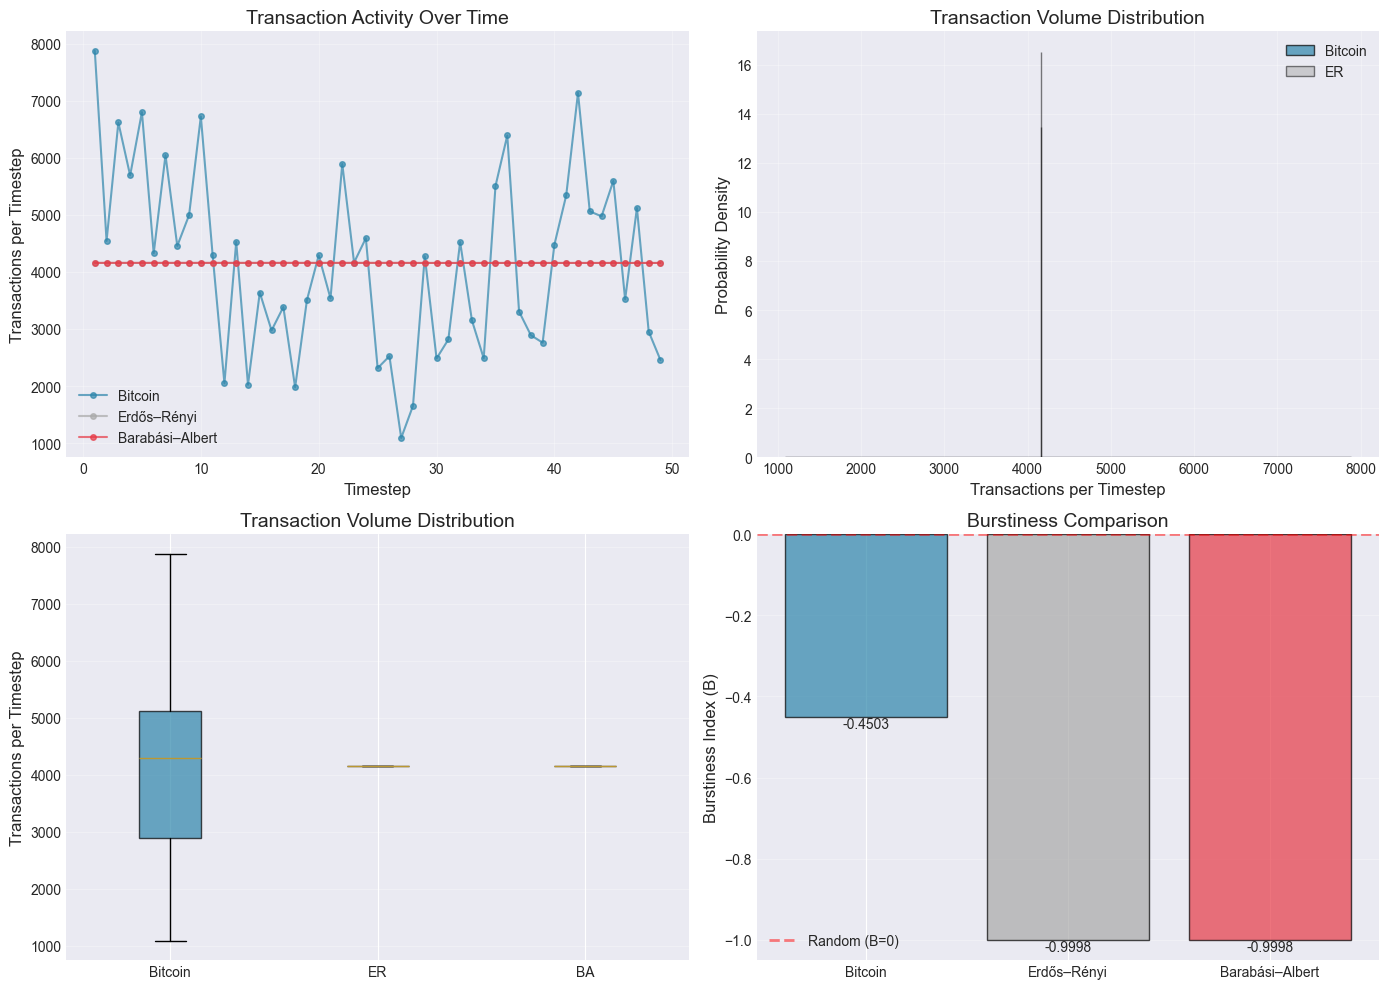

In [27]:
# Plot temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time series plot
for name, color_key in [('Bitcoin', 'bitcoin'), ('Erdős–Rényi', 'erdos_renyi'), ('Barabási–Albert', 'barabasi')]:
    times = temporal_data[name]['sorted_times']
    counts = activity_counts[name]
    axes[0, 0].plot(times, counts, 'o-', color=COLORS[color_key], alpha=0.7, label=name, markersize=4)

axes[0, 0].set_xlabel('Timestep')
axes[0, 0].set_ylabel('Transactions per Timestep')
axes[0, 0].set_title('Transaction Activity Over Time')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Histogram
axes[0, 1].hist(activity_counts['Bitcoin'], bins=30, alpha=0.7, color=COLORS['bitcoin'], 
                label='Bitcoin', edgecolor='black', density=True)
axes[0, 1].hist(activity_counts['Erdős–Rényi'], bins=30, alpha=0.5, color=COLORS['erdos_renyi'], 
                label='ER', edgecolor='black', density=True)
axes[0, 1].set_xlabel('Transactions per Timestep')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].set_title('Transaction Volume Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Box plots
data_to_plot = [activity_counts[name] for name in graphs]
bp = axes[1, 0].boxplot(data_to_plot, labels=['Bitcoin', 'ER', 'BA'], patch_artist=True)
colors_list = [COLORS['bitcoin'], COLORS['erdos_renyi'], COLORS['barabasi']]

for patch, color in zip(bp['boxes'], colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 0].set_ylabel('Transactions per Timestep')
axes[1, 0].set_title('Transaction Volume Distribution')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Burstiness comparison bar chart
datasets = list(graphs.keys())
burstiness_values = [burstiness_stats[name]['burstiness'] for name in datasets]

bars = axes[1, 1].bar(datasets, burstiness_values, color=colors_list, alpha=0.7, edgecolor='black')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Random (B=0)')
axes[1, 1].set_ylabel('Burstiness Index (B)')
axes[1, 1].set_title('Burstiness Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, burstiness_values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                    f'{val:.4f}', ha='center', va='bottom' if val >= 0 else 'top', fontsize=10)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'exp3_temporal_analysis.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: {OUTPUT_DIR / 'exp3_temporal_analysis.png'}")
plt.show()

## Experiment 4: Label Structure & Homophily Analysis

Analyze the distribution and connectivity patterns of licit vs illicit nodes in the Bitcoin graph.

In [28]:
# Analyze label distribution
def analyze_label_distribution(G, graph_name):
    labels = [G.nodes[n].get('label', None) for n in G.nodes()]
    
    licit = sum(1 for l in labels if l == 0)
    illicit = sum(1 for l in labels if l == 1)
    unknown = sum(1 for l in labels if l is None)
    total = len(labels)
    
    return {
        'licit': licit,
        'illicit': illicit,
        'unknown': unknown,
        'total': total,
        'labeled': licit + illicit,
        'licit_pct': 100 * licit / total,
        'illicit_pct': 100 * illicit / total,
        'unknown_pct': 100 * unknown / total
    }

label_stats = {name: analyze_label_distribution(G, name) for name, G in graphs.items()}

print("="*80)
print("LABEL DISTRIBUTION")
print("="*80)

for name in graphs:
    stats = label_stats[name]
    print(f"\n{name}:")
    print(f"  Licit: {stats['licit']:,} ({stats['licit_pct']:.2f}%)")
    print(f"  Illicit: {stats['illicit']:,} ({stats['illicit_pct']:.2f}%)")
    print(f"  Unknown: {stats['unknown']:,} ({stats['unknown_pct']:.2f}%)")

LABEL DISTRIBUTION

Bitcoin:
  Licit: 42,019 (20.62%)
  Illicit: 4,545 (2.23%)
  Unknown: 157,205 (77.15%)

Erdős–Rényi:
  Licit: 0 (0.00%)
  Illicit: 0 (0.00%)
  Unknown: 203,769 (100.00%)

Barabási–Albert:
  Licit: 0 (0.00%)
  Illicit: 0 (0.00%)
  Unknown: 203,769 (100.00%)


In [29]:
# Analyze neighborhood composition for illicit nodes
def analyze_neighborhood_composition(G, graph_name):
    illicit_nodes = [n for n in G.nodes() if G.nodes[n].get('label') == 1]
    
    if len(illicit_nodes) == 0:
        return None
    
    stats = {'licit': 0, 'illicit': 0, 'unknown': 0, 'total': 0}
    
    for node in illicit_nodes:
        neighbors = set(G.predecessors(node)) | set(G.successors(node))
        for neighbor in neighbors:
            stats['total'] += 1
            label = G.nodes[neighbor].get('label')
            if label == 0:
                stats['licit'] += 1
            elif label == 1:
                stats['illicit'] += 1
            else:
                stats['unknown'] += 1
    
    total = stats['total']
    if total > 0:
        stats['pct_licit'] = 100 * stats['licit'] / total
        stats['pct_illicit'] = 100 * stats['illicit'] / total
        stats['pct_unknown'] = 100 * stats['unknown'] / total
    
    return stats

print("\n" + "="*80)
print("NEIGHBORHOOD COMPOSITION (Illicit Node Neighbors)")
print("="*80)

neighbor_stats = {}
for name, G in graphs.items():
    result = analyze_neighborhood_composition(G, name)
    neighbor_stats[name] = result
    
    if result:
        print(f"\n{name}:")
        print(f"  Illicit neighbors: {result['illicit']:,} ({result['pct_illicit']:.2f}%)")
        print(f"  Licit neighbors: {result['licit']:,} ({result['pct_licit']:.2f}%)")
        print(f"  Unknown neighbors: {result['unknown']:,} ({result['pct_unknown']:.2f}%)")
    else:
        print(f"\n{name}: No illicit nodes")


NEIGHBORHOOD COMPOSITION (Illicit Node Neighbors)

Bitcoin:
  Illicit neighbors: 1,996 (21.83%)
  Licit neighbors: 1,696 (18.55%)
  Unknown neighbors: 5,451 (59.62%)

Erdős–Rényi: No illicit nodes

Barabási–Albert: No illicit nodes


In [30]:
# Compute label homophily (assortativity)
def compute_label_homophily(G, graph_name):
    node_labels = {n: G.nodes[n].get('label') for n in G.nodes() if G.nodes[n].get('label') is not None}
    
    if len(node_labels) < 2:
        return None
    
    G_labeled = G.subgraph(list(node_labels.keys()))
    
    try:
        homophily = nx.attribute_assortativity_coefficient(G_labeled, 'label')
        return homophily
    except:
        return 0

print("\n" + "="*80)
print("LABEL HOMOPHILY (Assortativity)")
print("="*80)
print("  Positive: Same-label nodes connect | Zero: Random | Negative: Cross-label\n")

homophily_stats = {}
for name, G in graphs.items():
    homophily = compute_label_homophily(G, name)
    homophily_stats[name] = homophily
    
    if homophily is not None:
        print(f"  {name}: {homophily:.4f}")
    else:
        print(f"  {name}: Insufficient labeled nodes")


LABEL HOMOPHILY (Assortativity)
  Positive: Same-label nodes connect | Zero: Random | Negative: Cross-label

  Bitcoin: 0.5163
  Erdős–Rényi: Insufficient labeled nodes
  Barabási–Albert: Insufficient labeled nodes


In [31]:
# Analyze structural properties by label
def analyze_structural_by_label(G, graph_name):
    licit_nodes = [n for n in G.nodes() if G.nodes[n].get('label') == 0]
    illicit_nodes = [n for n in G.nodes() if G.nodes[n].get('label') == 1]
    
    if len(illicit_nodes) == 0 or len(licit_nodes) == 0:
        return None
    
    licit_degrees = [G.degree(n) for n in licit_nodes]
    illicit_degrees = [G.degree(n) for n in illicit_nodes]
    
    return {
        'licit_count': len(licit_nodes),
        'illicit_count': len(illicit_nodes),
        'licit_mean_degree': np.mean(licit_degrees),
        'illicit_mean_degree': np.mean(illicit_degrees),
        'licit_mean_in': np.mean([G.in_degree(n) for n in licit_nodes]),
        'illicit_mean_in': np.mean([G.in_degree(n) for n in illicit_nodes]),
        'licit_mean_out': np.mean([G.out_degree(n) for n in licit_nodes]),
        'illicit_mean_out': np.mean([G.out_degree(n) for n in illicit_nodes]),
        'licit_degrees': licit_degrees,
        'illicit_degrees': illicit_degrees
    }

print("\n" + "="*80)
print("STRUCTURAL PROPERTIES BY LABEL")
print("="*80)

structural_stats = {}
for name, G in graphs.items():
    result = analyze_structural_by_label(G, name)
    structural_stats[name] = result
    
    if result:
        print(f"\n{name}:")
        print(f"  Licit ({result['licit_count']:,}): mean degree={result['licit_mean_degree']:.2f}")
        print(f"  Illicit ({result['illicit_count']:,}): mean degree={result['illicit_mean_degree']:.2f}")
    else:
        print(f"\n{name}: Insufficient labeled nodes")


STRUCTURAL PROPERTIES BY LABEL

Bitcoin:
  Licit (42,019): mean degree=3.10
  Illicit (4,545): mean degree=2.01

Erdős–Rényi: Insufficient labeled nodes

Barabási–Albert: Insufficient labeled nodes


✅ Saved: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/plots/exp4_label_analysis.png


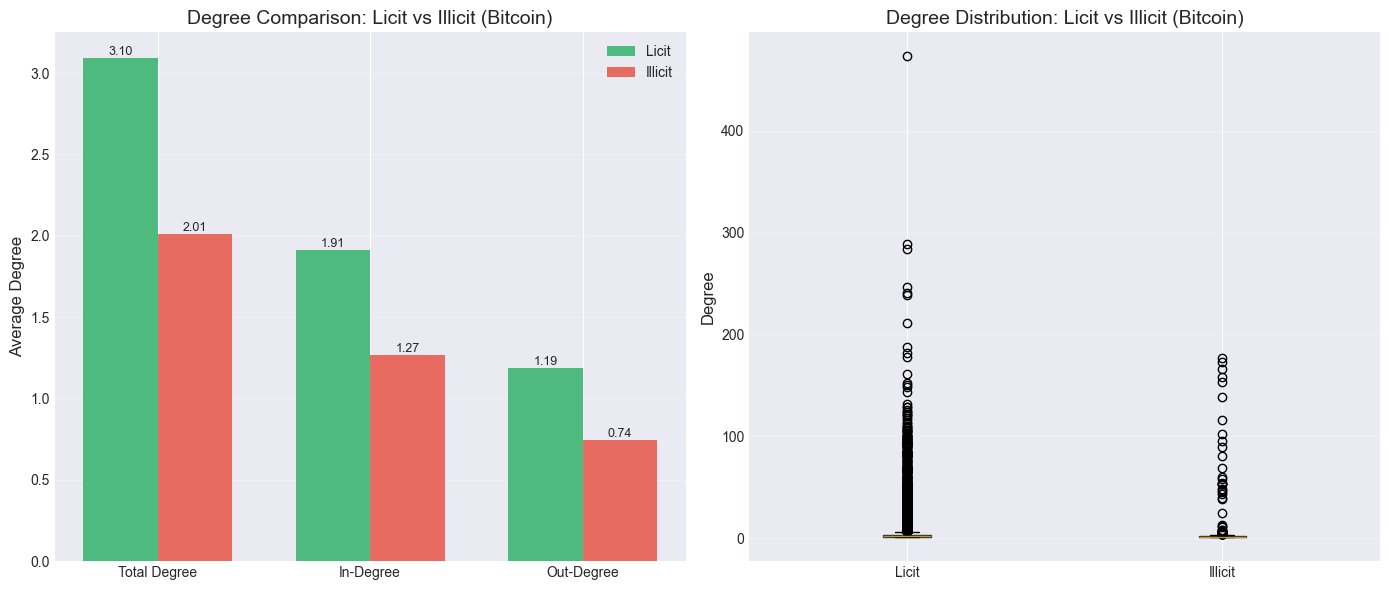

In [32]:
# Plot label analysis (Bitcoin only - random graphs have no labels)
if structural_stats['Bitcoin']:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    bitcoin_struct = structural_stats['Bitcoin']
    
    # Degree comparison bar chart
    categories = ['Total Degree', 'In-Degree', 'Out-Degree']
    licit_values = [bitcoin_struct['licit_mean_degree'], bitcoin_struct['licit_mean_in'], bitcoin_struct['licit_mean_out']]
    illicit_values = [bitcoin_struct['illicit_mean_degree'], bitcoin_struct['illicit_mean_in'], bitcoin_struct['illicit_mean_out']]
    
    x = np.arange(len(categories))
    width = 0.35
    
    bars1 = axes[0].bar(x - width/2, licit_values, width, label='Licit', color=COLORS['licit'], alpha=0.8)
    bars2 = axes[0].bar(x + width/2, illicit_values, width, label='Illicit', color=COLORS['illicit'], alpha=0.8)
    
    axes[0].set_ylabel('Average Degree')
    axes[0].set_title('Degree Comparison: Licit vs Illicit (Bitcoin)')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(categories)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='y')
    
    for bar in bars1:
        axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                    f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                    f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=9)
    
    # Degree distribution box plots
    bp = axes[1].boxplot([bitcoin_struct['licit_degrees'], bitcoin_struct['illicit_degrees']],
                         labels=['Licit', 'Illicit'], patch_artist=True)
    
    bp['boxes'][0].set_facecolor(COLORS['licit'])
    bp['boxes'][0].set_alpha(0.8)
    bp['boxes'][1].set_facecolor(COLORS['illicit'])
    bp['boxes'][1].set_alpha(0.8)
    
    axes[1].set_ylabel('Degree')
    axes[1].set_title('Degree Distribution: Licit vs Illicit (Bitcoin)')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'exp4_label_analysis.png', dpi=300, bbox_inches='tight')
    print(f"✅ Saved: {OUTPUT_DIR / 'exp4_label_analysis.png'}")
    plt.show()

In [33]:
# Create comprehensive summary
print("="*80)
print("COMPLETE ANALYSIS SUMMARY")
print("="*80)

# Experiment 1 summary
print("\n--- EXPERIMENT 1: Degree & Clustering ---")
print(f"Bitcoin max in-degree: {max(degree_data['Bitcoin']['in'])} vs ER: {max(degree_data['Erdős–Rényi']['in'])}")
print(f"Bitcoin clustering: {clustering_coefficients['Bitcoin']:.6f}")

# Experiment 2 summary
print("\n--- EXPERIMENT 2: Motif Analysis ---")
print(f"Bitcoin chains (≥5): {chains['Bitcoin']['chain_5+']} (unique to Bitcoin)")
print(f"Bitcoin triangles: {triangles['Bitcoin']['total_triangles']}")
print(f"Fan-in enrichment vs ER: {fan_in['Bitcoin']['fan_in_5+']/max(fan_in['Erdős–Rényi']['fan_in_5+'], 1):.1f}x")

# Experiment 3 summary
print("\n--- EXPERIMENT 3: Temporal Patterns ---")
print(f"Bitcoin burstiness: {burstiness_stats['Bitcoin']['burstiness']:.4f}")
print(f"Bitcoin CV: {burstiness_stats['Bitcoin']['cv']:.4f} vs ER: {burstiness_stats['Erdős–Rényi']['cv']:.4f}")
print(f"Temporal variability ratio: {burstiness_stats['Bitcoin']['cv']/max(burstiness_stats['Erdős–Rényi']['cv'], 0.0001):.0f}x")

# Experiment 4 summary
print("\n--- EXPERIMENT 4: Label Structure ---")
print(f"Illicit nodes: {label_stats['Bitcoin']['illicit']:,} ({label_stats['Bitcoin']['illicit_pct']:.2f}%)")
if homophily_stats['Bitcoin'] is not None:
    print(f"Label homophily: {homophily_stats['Bitcoin']:.4f}")
if neighbor_stats['Bitcoin']:
    print(f"Illicit-to-illicit connections: {neighbor_stats['Bitcoin']['pct_illicit']:.2f}%")

print("\n" + "="*80)

COMPLETE ANALYSIS SUMMARY

--- EXPERIMENT 1: Degree & Clustering ---
Bitcoin max in-degree: 284 vs ER: 9
Bitcoin clustering: 0.013762

--- EXPERIMENT 2: Motif Analysis ---
Bitcoin chains (≥5): 1137 (unique to Bitcoin)
Bitcoin triangles: 0
Fan-in enrichment vs ER: 3.4x

--- EXPERIMENT 3: Temporal Patterns ---
Bitcoin burstiness: -0.4503
Bitcoin CV: 0.3790 vs ER: 0.0001
Temporal variability ratio: 3169x

--- EXPERIMENT 4: Label Structure ---
Illicit nodes: 4,545 (2.23%)
Label homophily: 0.5163
Illicit-to-illicit connections: 21.83%



In [34]:
# Create summary dataframe
summary_data = []

for name in graphs:
    row = {
        'Dataset': name,
        'Nodes': graphs[name].number_of_nodes(),
        'Edges': graphs[name].number_of_edges(),
        'Max In-Degree': max(degree_data[name]['in']),
        'Clustering Coef': clustering_coefficients[name],
        'Fan-In (5+)': fan_in[name]['fan_in_5+'],
        'Chains (5+)': chains[name]['chain_5+'],
        'Triangles': triangles[name]['total_triangles'],
        'Burstiness': burstiness_stats[name]['burstiness'],
        'CV': burstiness_stats[name]['cv'],
        'Illicit Nodes': label_stats[name]['illicit'],
        'Homophily': homophily_stats[name] if homophily_stats[name] is not None else 'N/A'
    }
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
print("\nCOMPLETE SUMMARY TABLE")
print(summary_df.to_string(index=False))


COMPLETE SUMMARY TABLE
        Dataset  Nodes  Edges  Max In-Degree  Clustering Coef  Fan-In (5+)  Chains (5+)  Triangles  Burstiness       CV  Illicit Nodes Homophily
        Bitcoin 203769 234355            284         0.013762         4396         1137          0   -0.450315 0.379011           4545  0.516279
    Erdős–Rényi 203769 233058              9         0.000000         1297            0          0   -0.999761 0.000120              0       N/A
Barabási–Albert 203769 407536           1304         0.000000        13584            0          0   -0.999761 0.000120              0       N/A


In [35]:
# Save all results to CSV
print("Saving results...")

# Degree statistics
in_degree_stats.to_csv(RESULTS_DIR / 'exp1_in_degree_stats.csv', index=False)
out_degree_stats.to_csv(RESULTS_DIR / 'exp1_out_degree_stats.csv', index=False)

# Motif analysis
motif_df.to_csv(RESULTS_DIR / 'exp2_motif_counts.csv', index=False)
enrichment_df.to_csv(RESULTS_DIR / 'exp2_motif_enrichment.csv', index=False)

# Temporal analysis
temporal_summary = pd.DataFrame([{
    'Dataset': name,
    'Burstiness': burstiness_stats[name]['burstiness'],
    'CV': burstiness_stats[name]['cv'],
    'Mean': burstiness_stats[name]['mean'],
    'Std': burstiness_stats[name]['std'],
    'Min': burstiness_stats[name]['min'],
    'Max': burstiness_stats[name]['max']
} for name in graphs])
temporal_summary.to_csv(RESULTS_DIR / 'exp3_temporal_summary.csv', index=False)

# Label analysis
label_summary = pd.DataFrame([{
    'Dataset': name,
    'Licit': label_stats[name]['licit'],
    'Illicit': label_stats[name]['illicit'],
    'Unknown': label_stats[name]['unknown'],
    'Illicit %': label_stats[name]['illicit_pct']
} for name in graphs])
label_summary.to_csv(RESULTS_DIR / 'exp4_label_summary.csv', index=False)

# Complete summary
summary_df.to_csv(RESULTS_DIR / 'complete_summary.csv', index=False)

print(f"\n✅ All results saved to: {RESULTS_DIR}")
print("\nFiles created:")
for f in sorted(RESULTS_DIR.glob('*.csv')):
    print(f"  - {f.name}")

Saving results...

✅ All results saved to: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/results

Files created:
  - complete_summary.csv
  - exp1_in_degree_stats.csv
  - exp1_out_degree_stats.csv
  - exp2_motif_counts.csv
  - exp2_motif_enrichment.csv
  - exp3_temporal_summary.csv
  - exp4_label_summary.csv


In [36]:
print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print(f"\nPlots saved to: {OUTPUT_DIR}")
print(f"Results saved to: {RESULTS_DIR}")


ANALYSIS COMPLETE

Plots saved to: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/plots
Results saved to: /Users/mukunthan/Downloads/MTP 2026/synthetic-btc-analysis/experiments/results
